# Sentiment Analysis with NLP

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Renua-Meireles/sentiment-analisys-with-MLP/blob/main/MLP_Sentiment_Analysis_(PIBIC_2021).ipynb)

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
BASE_PATH = './data/'
datasetpath = f'{BASE_PATH}/movie.csv'
os.listdir(BASE_PATH)

['movie.csv']

## Loading Dataset

In [3]:
df = pd.read_csv(datasetpath, encoding='utf-8')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df.loc[1, 'text']

"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, 

In [5]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df.columns

Index(['text', 'label'], dtype='object')

### Text Preprocessing

In [9]:
import nltk

#### Text cleanning

In [10]:
import re
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

def clear_text(text:str):
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text) # remove html tags
    text = re.sub(r'[^A-Za-z0–9]+',' ', text) # remove punctuation
    text = re.sub(r'  +', ' ', text) # remove extra spaces
    text = ' '.join(filter(lambda word: word not in stop_words, text.split(' ')))
    return text.strip()

df['text_clean'] = df['text'].apply(clear_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,text_clean
0,I grew up (b. 1965) watching and loving the Th...,0,grew b 9 watching loving thunderbirds mates sc...
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chips expectatio...
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movies bor...
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...


#### Lemmatization + Tokenization

In [11]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    
df['lemmatized_tokens'] = df['text_clean'].apply(lemmatize_text)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\renua\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\renua\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\renua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label,text_clean,lemmatized_tokens
0,I grew up (b. 1965) watching and loving the Th...,0,grew b 9 watching loving thunderbirds mates sc...,"[grew, b, 9, watching, loving, thunderbird, ma..."
1,"When I put this movie in my DVD player, and sa...",0,put movie dvd player sat coke chips expectatio...,"[put, movie, dvd, player, sat, coke, chip, exp..."
2,Why do people who do not know what a particula...,0,people know particular time past like feel nee...,"[people, know, particular, time, past, like, f..."
3,Even though I have great interest in Biblical ...,0,even though great interest biblical movies bor...,"[even, though, great, interest, biblical, movi..."
4,Im a die hard Dads Army fan and nothing will e...,1,im die hard dads army fan nothing ever change ...,"[im, die, hard, dad, army, fan, nothing, ever,..."


#### Visualizing most frequent words

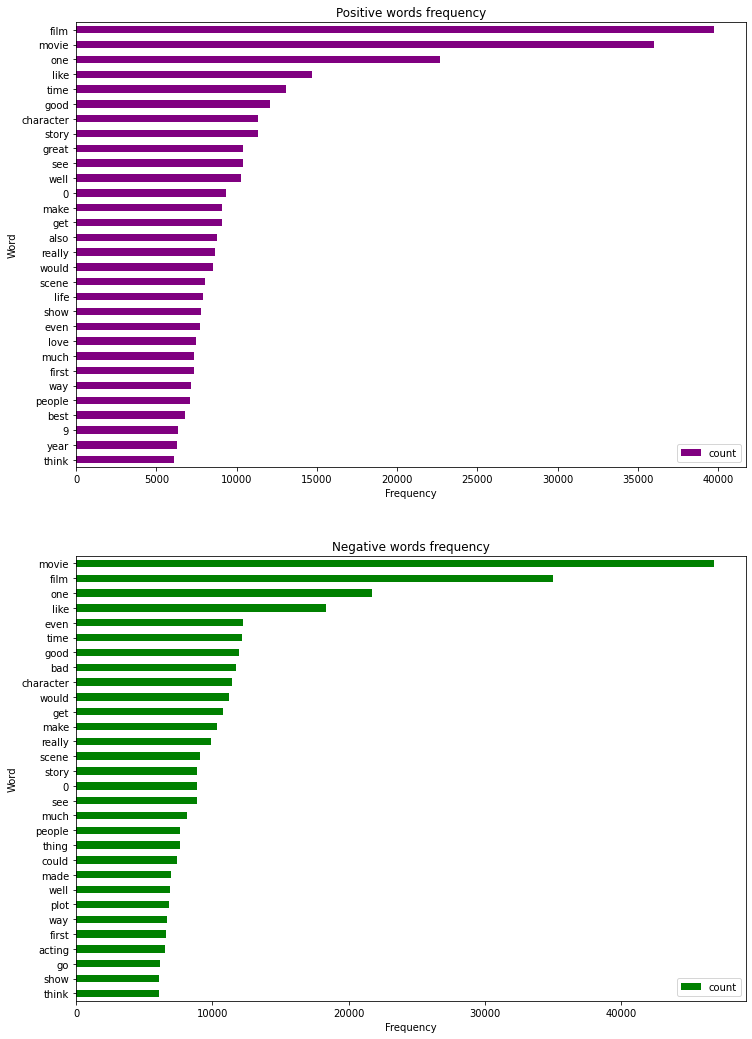

In [13]:
import itertools
import collections

positive_lemmatized_tokens = list(df.loc[df['label'] == 1]['lemmatized_tokens'])
negative_lemmatized_tokens = list(df.loc[df['label'] == 0]['lemmatized_tokens'])
token_list_positive = list(itertools.chain(*positive_lemmatized_tokens))
token_list_negative = list(itertools.chain(*negative_lemmatized_tokens))

counts_no_positive = collections.Counter(token_list_positive)
counts_no_negative = collections.Counter(token_list_negative)

positive_words_freq_df = pd.DataFrame(counts_no_positive.most_common(30), columns=['words', 'count'])
positive_words_freq_df['label'] = 1
negative_words_freq_df = pd.DataFrame(counts_no_negative.most_common(30), columns=['words', 'count'])
negative_words_freq_df['label'] = 0

fig, [ax0, ax1] = plt.subplots(2, 1, figsize=(12, 18))
positive_words_freq_df.sort_values(by='count').plot.barh(x='words', y='count', ax=ax0, color="purple")
ax0.set_title('Positive words frequency')
ax0.set_xlabel('Frequency')
ax0.set_ylabel('Word')

negative_words_freq_df.sort_values(by='count').plot.barh(x='words', y='count', ax=ax1, color="green")
ax1.set_title('Negative words frequency')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Word')

plt.show()

#### Counting words

Min: 3
Max: 1422
Mean: 119.1329
Standard Deviation: 89.98017947530145


<AxesSubplot:>

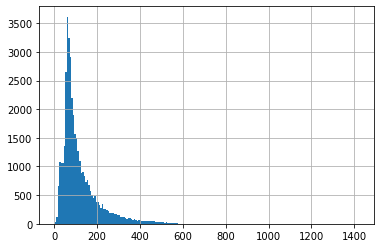

In [14]:
df['word_count'] = df['lemmatized_tokens'].apply(lambda x: len(x))

# print word count statistics
print('Min:', df['word_count'].min())
print('Max:', df['word_count'].max())
print('Mean:', df['word_count'].mean())
print('Standard Deviation:', df['word_count'].std())

#show the distribution of word count
df['word_count'].hist(bins=200)

In [15]:
unique_words = set(itertools.chain(*df['lemmatized_tokens']))
len(unique_words)

81965

### Vectorization -> TF-IDF (method 1)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features = 2000
tfidf_converter = TfidfVectorizer(max_features=max_features)
features_tf_idf = tfidf_converter.fit_transform(df['text_clean']).toarray()

In [17]:
from sklearn.model_selection import train_test_split
train_x, test_x, y_train, y_test = train_test_split(features_tf_idf, df.label, test_size=0.25, random_state=123)

### Tokenzation - Padding (method 2) - Better when using Embedding layer

In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>") # any unknown words will be replaced by oov_token

In [58]:
vocab_size = len(unique_words)//2
max_features = int(df['word_count'].mean()) # the length of each review. If originally the comment is longer than "max_features" words, it will be truncated
trunc_type = 'post' # the review will be truncated at the end when a review is bigger than "max_features" or padded when a review is smaller than "max_length"
padding_type = 'post' # padding will be applied at the end, not in the beginning
oov_tok = '<OOV>' # any unknown words will be replaced by oov_token

In [61]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df['text_clean'])
word_index = tokenizer.word_index

In [62]:
word_index

{'<OOV>': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'like': 5,
 'good': 6,
 'time': 7,
 'even': 8,
 'would': 9,
 'really': 10,
 'story': 11,
 'see': 12,
 'well': 13,
 'much': 14,
 '0': 15,
 'get': 16,
 'bad': 17,
 'people': 18,
 'also': 19,
 'great': 20,
 'first': 21,
 'made': 22,
 'make': 23,
 'way': 24,
 'could': 25,
 'movies': 26,
 'characters': 27,
 'think': 28,
 'watch': 29,
 'character': 30,
 'films': 31,
 'two': 32,
 'seen': 33,
 'many': 34,
 'love': 35,
 '9': 36,
 'plot': 37,
 'never': 38,
 'life': 39,
 'acting': 40,
 'show': 41,
 'little': 42,
 'best': 43,
 'know': 44,
 'ever': 45,
 'man': 46,
 'better': 47,
 'end': 48,
 'scene': 49,
 'still': 50,
 'say': 51,
 'scenes': 52,
 'something': 53,
 'go': 54,
 'back': 55,
 'real': 56,
 'thing': 57,
 'watching': 58,
 'actors': 59,
 'director': 60,
 'years': 61,
 'though': 62,
 'funny': 63,
 'old': 64,
 'actually': 65,
 'work': 66,
 'another': 67,
 'look': 68,
 'nothing': 69,
 'makes': 70,
 'find': 71,
 'going': 72,
 'new': 73,
 'lot': 7

In [63]:
seq = tokenizer.texts_to_sequences(df['text_clean'])
x_tokenized_padded = pad_sequences(seq, maxlen=max_features, truncating=trunc_type)

In [64]:
print(x_tokenized_padded.shape)
x_tokenized_padded

(40000, 119)


array([[    0,     0,     0, ...,   497,  5735,  5685],
       [  161,     2,   154, ...,   189,    33,    21],
       [    0,     0,     0, ...,  2131,    36,    36],
       ...,
       [    0,     0,     0, ...,  1164,  4557,   645],
       [    0,     0,     0, ..., 24590,  3084,    15],
       [    0,     0,     0, ...,   222,   791,  6572]])

In [70]:
from sklearn.model_selection import train_test_split
train_x, test_x, y_train, y_test = train_test_split(x_tokenized_padded, df.label, test_size=0.25, random_state=123)

In [66]:
train_x = train_x / np.linalg.norm(train_x, axis=1, keepdims=True)
test_x = test_x / np.linalg.norm(test_x, axis=1, keepdims=True)

## Building the model

In [18]:
import tensorflow as tf
from tensorflow.keras import layers

In [19]:
model = tf.keras.Sequential([
    layers.Input(shape=(max_features, )),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64032     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 64,705
Trainable params: 64,705
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [20]:
# Create a callback that saves the model's weights
from pathlib import Path

WEIGHTS_PATH = './Weights_per_epochs'
Path(WEIGHTS_PATH).mkdir(parents=True, exist_ok=True)

checkpoint_path = "./Weights_per_epochs/weights{epoch:02d}.hdf5"
callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [21]:
for file in Path(WEIGHTS_PATH).glob('*'):
    file.unlink()

epochs = 10
history = model.fit(train_x, y_train, 
                    epochs=epochs, 
                    validation_data=(test_x, y_test),
                    callbacks=[callback])

Epoch 1/10
933/938 [============================>.] - ETA: 0s - loss: 0.3494 - accuracy: 0.8517
Epoch 1: saving model to ./Weights_per_epochs\weights01.hdf5
938/938 [==============================] - 3s 3ms/step - loss: 0.3493 - accuracy: 0.8518 - val_loss: 0.3006 - val_accuracy: 0.8697
Epoch 2/10
933/938 [============================>.] - ETA: 0s - loss: 0.2689 - accuracy: 0.8895
Epoch 2: saving model to ./Weights_per_epochs\weights02.hdf5
938/938 [==============================] - 3s 3ms/step - loss: 0.2693 - accuracy: 0.8894 - val_loss: 0.2870 - val_accuracy: 0.8784
Epoch 3/10
928/938 [============================>.] - ETA: 0s - loss: 0.2512 - accuracy: 0.8978
Epoch 3: saving model to ./Weights_per_epochs\weights03.hdf5
938/938 [==============================] - 2s 2ms/step - loss: 0.2515 - accuracy: 0.8976 - val_loss: 0.2901 - val_accuracy: 0.8769
Epoch 4/10
919/938 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9124
Epoch 4: saving model to ./Weights_per_e

### Model Performance

<Figure size 432x288 with 0 Axes>

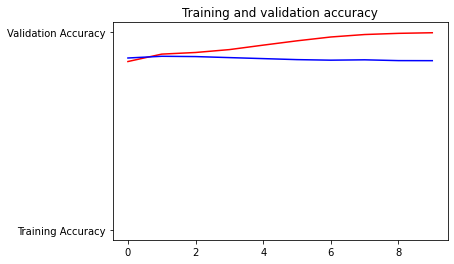

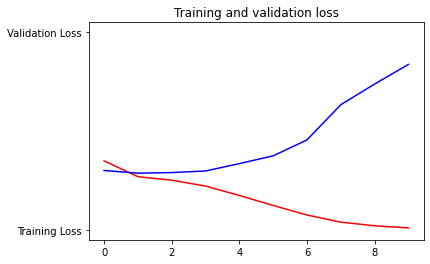

<Figure size 432x288 with 0 Axes>

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epcs=range(len(acc))

plt.plot(epcs, acc, 'r', 'Training Accuracy')
plt.plot(epcs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epcs, loss, 'r', 'Training Loss')
plt.plot(epcs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

## Histograms

In [23]:
list_weights = os.listdir('./Weights_per_epochs')
len(list_weights)

10

In [24]:
def get_weights_from_layer(model, weights_dir, layer_number, num_epochs):
    weights = np.array([])
    for i in range(num_epochs):
        model.load_weights(f'{weights_dir}/{list_weights[i]}')
        weights = np.append(weights, model.get_weights()[0][layer_number])
    
    # weights = weights.reshape(num_epochs, -1)
    return weights

In [25]:
weights_from_layer0 = get_weights_from_layer(model, './Weights_per_epochs', 0, epochs)
weights_from_layer1 = get_weights_from_layer(model, './Weights_per_epochs', 1, epochs)
weights_from_layer2 = get_weights_from_layer(model, './Weights_per_epochs', 2, epochs)
weights_from_layer3 = get_weights_from_layer(model, './Weights_per_epochs', 3, epochs)
weights_from_layer0.shape # (15, 32) - 15 epochs, 32 neurons in the layer

(320,)

In [26]:
weights_from_layer0[:10] # all weights from the second neuron in the first layer

array([ 0.03636436,  0.02432682, -0.00732699,  0.08579352,  0.04203139,
       -0.03568668,  0.06724966,  0.00556915,  0.01658848, -0.02650351])

In [27]:
from scipy.stats import norm
plt.style.use('seaborn-whitegrid')

In [28]:
def plot_weights_histogram(*weights):
    """This method plots the histogram of the weights of a layer along the epochs"""
    fig, ax = plt.subplots(figsize=(8, 6))
    _, bins1 = np.histogram(weights[0], bins=50)
    _, bins2 = np.histogram(weights[1], bins=50)
    _, bins3 = np.histogram(weights[2], bins=50)
    _, bins4 = np.histogram(weights[3], bins=50)
    # _, bins1, _ = ax.hist(weights[0], bins=50, label='Layer 0', histtype='bar', density=True)
    # _, bins2, _ = ax.hist(weights[1], bins=50, label='Layer 1', density=True)
    # _, bins3, _ = ax.hist(weights[2], bins=50, label='Layer 2', density=True)
    y1 = norm.pdf(bins1, weights[0].mean(), weights[0].std())
    y2 = norm.pdf(bins2, weights[1].mean(), weights[1].std())
    y3 = norm.pdf(bins3, weights[2].mean(), weights[2].std())
    y4 = norm.pdf(bins4, weights[3].mean(), weights[3].std())
    ax.plot(bins1, y1, '--', label='Layer 0')
    ax.plot(bins2, y2, '--', label='Layer 1')
    ax.plot(bins3, y3, '--', label='Layer 2')
    ax.plot(bins4, y4, '--', label='Layer 3')
    ax.legend(loc='best')
    ax.set_title('Histogram of weights')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Weight value')
    fig.tight_layout()
    ax.grid(False)
    

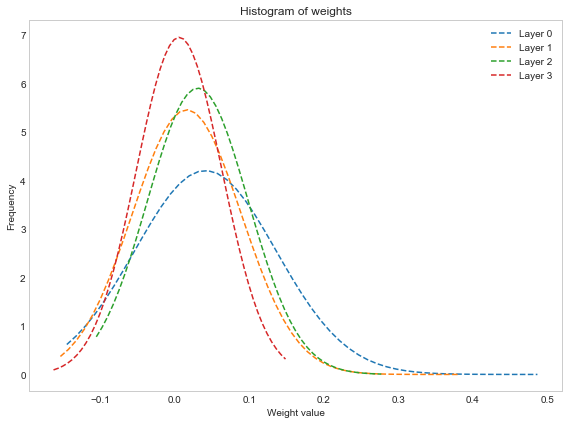

In [29]:
plot_weights_histogram(weights_from_layer0, weights_from_layer1, weights_from_layer2, weights_from_layer3)